# ELISA Concentration computation with 4 Parameter Logistic curve

### Plate Layout + Raw data Timepoint 3

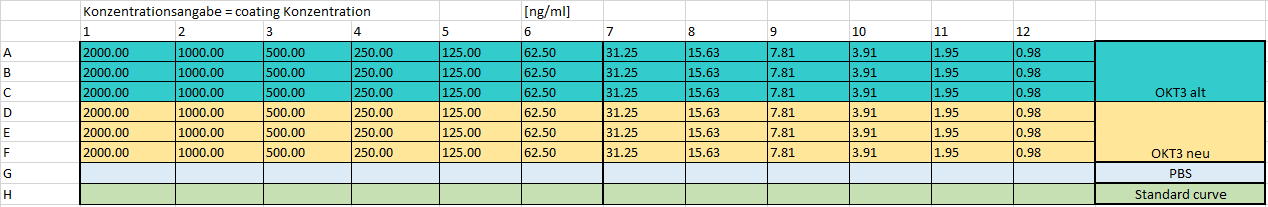

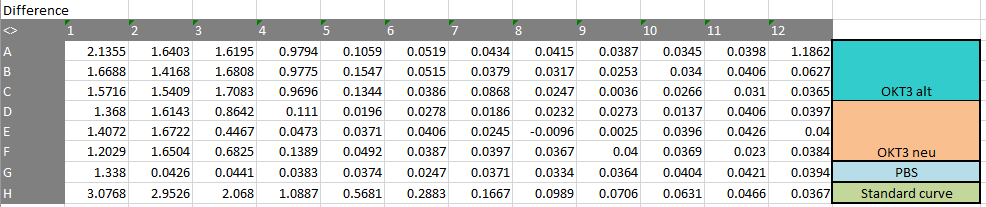

### Importing relevant libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import warnings
from sklearn.metrics import r2_score
import pandas as pd
import openpyxl

### Curve fitting + computation of standard curve

In [4]:
warnings.filterwarnings("ignore")

x = (20000, 10000, 5000, 2500, 1250, 625, 312.5, 156.25, 78.125, 39.063, 19.531, 9.766)  # pg/ml
x = np.array(x)

y = (3.0768, 2.9526, 2.068, 1.0887, 0.5681, 0.2883, 0.1667, 0.0989, 0.0706, 0.0631, 0.0466, 0.0367)
y = np.array(y)


def FourPLFunction(x, a, b, c, d):
    return d+(a-d)/(1+ (x/c)**b) 

parameters_optimal, parameters_cov = optimize.curve_fit(FourPLFunction, x, y, p0=[y[-1], 1, 1, y[0]])

a = parameters_optimal[0] # min
b = parameters_optimal[1] # inflection point
c = parameters_optimal[2] # hills slope of the curve (=steepness at point b)
d = parameters_optimal[3] # max

x_model = np.linspace(min(x), max(x), 100) # used to model standard curve
y_model = FourPLFunction(x_model, a, b, c, d) # used to model standard curve

y_predicted = FourPLFunction(x, a, b, c, d) # used to compute R squared value

### Graphics section

a =  0.08210096774983598  min value 
b =  1.7265398666476854  inflection point 
c =  3750.9182855463414  steepness at point b 
d =  3.3286885286990358  max value

R^2 =  0.9971165959356589


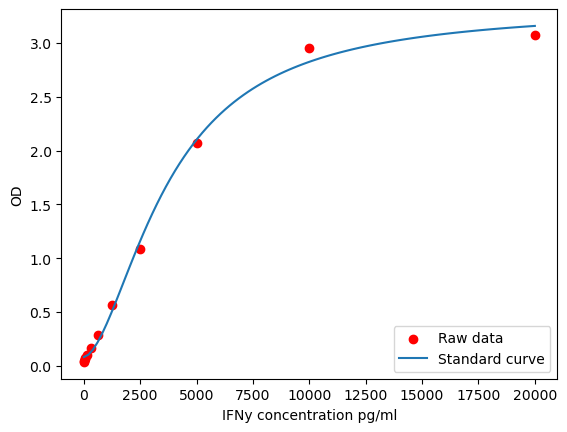

In [5]:
print("a = ", a, " min value", "\nb = ", b, " inflection point", "\nc = ", c, " steepness at point b", "\nd = ",d, " max value" "\n") 

print("R^2 = ", r2_score(y, y_predicted)) # computation of R^2

plt.scatter(x, y, color = "red", marker = "o", label='Raw data')
plt.plot(x_model, y_model, label = "Standard curve")
plt.xlabel("IFNy concentration pg/ml")
plt.ylabel("OD")
plt.legend(loc = "lower right")
plt.show()

### Concentration computation of raw data

In [24]:
def OD_to_concentration(y, a=a, b=b, c=c, d=d):
    """Transforms measured OD values into concentration values"""
    x = c*(((a-d)/(y-d))-1)**1/b
    return(x)

# importing the respective excel file
df = pd.read_excel('Astrid`s ELISA_20230125_105556 OKT3 IFN3.xlsx', header = None)

# extract the data from specific cells
cell_data = df.iloc[68:76, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

# convert the extracted data to a numpy matrix
OD_matrix = np.array(cell_data)
print(OD_matrix)

c_matrix = OD_to_concentration(OD_matrix)

print(c_matrix)
OKT3_alt = c_matrix[np.ix_([0])]

print(OKT3_alt)


[[2.1355 1.6403 1.6195 0.9794 0.1059 0.0519 0.0434 0.0415 0.0387 0.0345
  0.0398 1.1862]
 [1.6688 1.4168 1.6808 0.9775 0.1547 0.0515 0.0379 0.0317 0.0253 0.034
  0.0406 0.0627]
 [1.5716 1.5409 1.7083 0.9696 0.1344 0.0386 0.0868 0.0247 0.0036 0.0266
  0.031 0.0365]
 [1.368 1.6143 0.8642 0.111 0.0196 0.0278 0.0186 0.0232 0.0273 0.0137
  0.0406 0.0397]
 [1.4072 1.6722 0.4467 0.0473 0.0371 0.0406 0.0245 -0.0096 0.0025 0.0396
  0.0426 0.04]
 [1.2029 1.6504 0.6825 0.1389 0.0492 0.0387 0.0397 0.0367 0.04 0.0369
  0.023 0.0384]
 [1.338 0.0426 0.0441 0.0383 0.0374 0.0247 0.0371 0.0334 0.0364 0.0404
  0.0421 0.0394]
 [3.0768 2.9526 2.068 1.0887 0.5681 0.2883 0.1667 0.0989 0.0706 0.0631
  0.0466 0.0367]]
[[2.1355 1.6403 1.6195 0.9794 0.1059 0.0519 0.0434 0.0415 0.0387 0.0345
  0.0398 1.1862]
 [1.6688 1.4168 1.6808 0.9775 0.1547 0.0515 0.0379 0.0317 0.0253 0.034
  0.0406 0.0627]
 [1.5716 1.5409 1.7083 0.9696 0.1344 0.0386 0.0868 0.0247 0.0036 0.0266
  0.031 0.0365]
 [1.368 1.6143 0.8642 0.111 0.01

In [2]:
plt.bar(matrix, 1000)

NameError: name 'plt' is not defined